In [1]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import sklearn.model_selection as skm 

In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'simpsons\simpsons_dataset'

In [5]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
# just count the first 10 items
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [7]:
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - homer_simpson
2 - homer_simpson
3 - homer_simpson
4 - homer_simpson
5 - homer_simpson
6 - homer_simpson
7 - homer_simpson
8 - homer_simpson
9 - homer_simpson
10 - homer_simpson
11 - homer_simpson
12 - homer_simpson
13 - homer_simpson
14 - homer_simpson
15 - homer_simpson
16 - homer_simpson
17 - homer_simpson
18 - homer_simpson
19 - homer_simpson
20 - homer_simpson
21 - homer_simpson
22 - homer_simpson
23 - homer_simpson
24 - homer_simpson
25 - homer_simpson
26 - homer_simpson
27 - homer_simpson
28 - homer_simpson
29 - homer_simpson
30 - homer_simpson
31 - homer_simpson
32 - homer_simpson
33 - homer_simpson
34 - homer_simpson
35 - homer_simpson
36 - homer_simpson
37 - homer_simpson
38 - homer_simpson
39 - homer_simpson
40 - homer_simpson
41 - homer_simpson
42 - homer_simpson
43 - homer_simpson
44 - homer_simpson
45 - homer_simpson
46 - homer_simpson
47 - homer_simps

429 - homer_simpson
430 - homer_simpson
431 - homer_simpson
432 - homer_simpson
433 - homer_simpson
434 - homer_simpson
435 - homer_simpson
436 - homer_simpson
437 - homer_simpson
438 - homer_simpson
439 - homer_simpson
440 - homer_simpson
441 - homer_simpson
442 - homer_simpson
443 - homer_simpson
444 - homer_simpson
445 - homer_simpson
446 - homer_simpson
447 - homer_simpson
448 - homer_simpson
449 - homer_simpson
450 - homer_simpson
451 - homer_simpson
452 - homer_simpson
453 - homer_simpson
454 - homer_simpson
455 - homer_simpson
456 - homer_simpson
457 - homer_simpson
458 - homer_simpson
459 - homer_simpson
460 - homer_simpson
461 - homer_simpson
462 - homer_simpson
463 - homer_simpson
464 - homer_simpson
465 - homer_simpson
466 - homer_simpson
467 - homer_simpson
468 - homer_simpson
469 - homer_simpson
470 - homer_simpson
471 - homer_simpson
472 - homer_simpson
473 - homer_simpson
474 - homer_simpson
475 - homer_simpson
476 - homer_simpson
477 - homer_simpson
478 - homer_simpson


861 - homer_simpson
862 - homer_simpson
863 - homer_simpson
864 - homer_simpson
865 - homer_simpson
866 - homer_simpson
867 - homer_simpson
868 - homer_simpson
869 - homer_simpson
870 - homer_simpson
871 - homer_simpson
872 - homer_simpson
873 - homer_simpson
874 - homer_simpson
875 - homer_simpson
876 - homer_simpson
877 - homer_simpson
878 - homer_simpson
879 - homer_simpson
880 - homer_simpson
881 - homer_simpson
882 - homer_simpson
883 - homer_simpson
884 - homer_simpson
885 - homer_simpson
886 - homer_simpson
887 - homer_simpson
888 - homer_simpson
889 - homer_simpson
890 - homer_simpson
891 - homer_simpson
892 - homer_simpson
893 - homer_simpson
894 - homer_simpson
895 - homer_simpson
896 - homer_simpson
897 - homer_simpson
898 - homer_simpson
899 - homer_simpson
900 - homer_simpson
901 - homer_simpson
902 - homer_simpson
903 - homer_simpson
904 - homer_simpson
905 - homer_simpson
906 - homer_simpson
907 - homer_simpson
908 - homer_simpson
909 - homer_simpson
910 - homer_simpson


1274 - homer_simpson
1275 - homer_simpson
1276 - homer_simpson
1277 - homer_simpson
1278 - homer_simpson
1279 - homer_simpson
1280 - homer_simpson
1281 - homer_simpson
1282 - homer_simpson
1283 - homer_simpson
1284 - homer_simpson
1285 - homer_simpson
1286 - homer_simpson
1287 - homer_simpson
1288 - homer_simpson
1289 - homer_simpson
1290 - homer_simpson
1291 - homer_simpson
1292 - homer_simpson
1293 - homer_simpson
1294 - homer_simpson
1295 - homer_simpson
1296 - homer_simpson
1297 - homer_simpson
1298 - homer_simpson
1299 - homer_simpson
1300 - homer_simpson
1301 - homer_simpson
1302 - homer_simpson
1303 - homer_simpson
1304 - homer_simpson
1305 - homer_simpson
1306 - homer_simpson
1307 - homer_simpson
1308 - homer_simpson
1309 - homer_simpson
1310 - homer_simpson
1311 - homer_simpson
1312 - homer_simpson
1313 - homer_simpson
1314 - homer_simpson
1315 - homer_simpson
1316 - homer_simpson
1317 - homer_simpson
1318 - homer_simpson
1319 - homer_simpson
1320 - homer_simpson
1321 - homer_

1665 - homer_simpson
1666 - homer_simpson
1667 - homer_simpson
1668 - homer_simpson
1669 - homer_simpson
1670 - homer_simpson
1671 - homer_simpson
1672 - homer_simpson
1673 - homer_simpson
1674 - homer_simpson
1675 - homer_simpson
1676 - homer_simpson
1677 - homer_simpson
1678 - homer_simpson
1679 - homer_simpson
1680 - homer_simpson
1681 - homer_simpson
1682 - homer_simpson
1683 - homer_simpson
1684 - homer_simpson
1685 - homer_simpson
1686 - homer_simpson
1687 - homer_simpson
1688 - homer_simpson
1689 - homer_simpson
1690 - homer_simpson
1691 - homer_simpson
1692 - homer_simpson
1693 - homer_simpson
1694 - homer_simpson
1695 - homer_simpson
1696 - homer_simpson
1697 - homer_simpson
1698 - homer_simpson
1699 - homer_simpson
1700 - homer_simpson
1701 - homer_simpson
1702 - homer_simpson
1703 - homer_simpson
1704 - homer_simpson
1705 - homer_simpson
1706 - homer_simpson
1707 - homer_simpson
1708 - homer_simpson
1709 - homer_simpson
1710 - homer_simpson
1711 - homer_simpson
1712 - homer_

2063 - homer_simpson
2064 - homer_simpson
2065 - homer_simpson
2066 - homer_simpson
2067 - homer_simpson
2068 - homer_simpson
2069 - homer_simpson
2070 - homer_simpson
2071 - homer_simpson
2072 - homer_simpson
2073 - homer_simpson
2074 - homer_simpson
2075 - homer_simpson
2076 - homer_simpson
2077 - homer_simpson
2078 - homer_simpson
2079 - homer_simpson
2080 - homer_simpson
2081 - homer_simpson
2082 - homer_simpson
2083 - homer_simpson
2084 - homer_simpson
2085 - homer_simpson
2086 - homer_simpson
2087 - homer_simpson
2088 - homer_simpson
2089 - homer_simpson
2090 - homer_simpson
2091 - homer_simpson
2092 - homer_simpson
2093 - homer_simpson
2094 - homer_simpson
2095 - homer_simpson
2096 - homer_simpson
2097 - homer_simpson
2098 - homer_simpson
2099 - homer_simpson
2100 - homer_simpson
2101 - homer_simpson
2102 - homer_simpson
2103 - homer_simpson
2104 - homer_simpson
2105 - homer_simpson
2106 - homer_simpson
2107 - homer_simpson
2108 - homer_simpson
2109 - homer_simpson
2110 - homer_

291 - ned_flanders
292 - ned_flanders
293 - ned_flanders
294 - ned_flanders
295 - ned_flanders
296 - ned_flanders
297 - ned_flanders
298 - ned_flanders
299 - ned_flanders
300 - ned_flanders
301 - ned_flanders
302 - ned_flanders
303 - ned_flanders
304 - ned_flanders
305 - ned_flanders
306 - ned_flanders
307 - ned_flanders
308 - ned_flanders
309 - ned_flanders
310 - ned_flanders
311 - ned_flanders
312 - ned_flanders
313 - ned_flanders
314 - ned_flanders
315 - ned_flanders
316 - ned_flanders
317 - ned_flanders
318 - ned_flanders
319 - ned_flanders
320 - ned_flanders
321 - ned_flanders
322 - ned_flanders
323 - ned_flanders
324 - ned_flanders
325 - ned_flanders
326 - ned_flanders
327 - ned_flanders
328 - ned_flanders
329 - ned_flanders
330 - ned_flanders
331 - ned_flanders
332 - ned_flanders
333 - ned_flanders
334 - ned_flanders
335 - ned_flanders
336 - ned_flanders
337 - ned_flanders
338 - ned_flanders
339 - ned_flanders
340 - ned_flanders
341 - ned_flanders
342 - ned_flanders
343 - ned_fl

772 - ned_flanders
773 - ned_flanders
774 - ned_flanders
775 - ned_flanders
776 - ned_flanders
777 - ned_flanders
778 - ned_flanders
779 - ned_flanders
780 - ned_flanders
781 - ned_flanders
782 - ned_flanders
783 - ned_flanders
784 - ned_flanders
785 - ned_flanders
786 - ned_flanders
787 - ned_flanders
788 - ned_flanders
789 - ned_flanders
790 - ned_flanders
791 - ned_flanders
792 - ned_flanders
793 - ned_flanders
794 - ned_flanders
795 - ned_flanders
796 - ned_flanders
797 - ned_flanders
798 - ned_flanders
799 - ned_flanders
800 - ned_flanders
801 - ned_flanders
802 - ned_flanders
803 - ned_flanders
804 - ned_flanders
805 - ned_flanders
806 - ned_flanders
807 - ned_flanders
808 - ned_flanders
809 - ned_flanders
810 - ned_flanders
811 - ned_flanders
812 - ned_flanders
813 - ned_flanders
814 - ned_flanders
815 - ned_flanders
816 - ned_flanders
817 - ned_flanders
818 - ned_flanders
819 - ned_flanders
820 - ned_flanders
821 - ned_flanders
822 - ned_flanders
823 - ned_flanders
824 - ned_fl

1198 - ned_flanders
1199 - ned_flanders
1200 - ned_flanders
1201 - ned_flanders
1202 - ned_flanders
1203 - ned_flanders
1204 - ned_flanders
1205 - ned_flanders
1206 - ned_flanders
1207 - ned_flanders
1208 - ned_flanders
1209 - ned_flanders
1210 - ned_flanders
1211 - ned_flanders
1212 - ned_flanders
1213 - ned_flanders
1214 - ned_flanders
1215 - ned_flanders
1216 - ned_flanders
1217 - ned_flanders
1218 - ned_flanders
1219 - ned_flanders
1220 - ned_flanders
1221 - ned_flanders
1222 - ned_flanders
1223 - ned_flanders
1224 - ned_flanders
1225 - ned_flanders
1226 - ned_flanders
1227 - ned_flanders
1228 - ned_flanders
1229 - ned_flanders
1230 - ned_flanders
1231 - ned_flanders
1232 - ned_flanders
1233 - ned_flanders
1234 - ned_flanders
1235 - ned_flanders
1236 - ned_flanders
1237 - ned_flanders
1238 - ned_flanders
1239 - ned_flanders
1240 - ned_flanders
1241 - ned_flanders
1242 - ned_flanders
1243 - ned_flanders
1244 - ned_flanders
1245 - ned_flanders
1246 - ned_flanders
1247 - ned_flanders


204 - moe_szyslak
205 - moe_szyslak
206 - moe_szyslak
207 - moe_szyslak
208 - moe_szyslak
209 - moe_szyslak
210 - moe_szyslak
211 - moe_szyslak
212 - moe_szyslak
213 - moe_szyslak
214 - moe_szyslak
215 - moe_szyslak
216 - moe_szyslak
217 - moe_szyslak
218 - moe_szyslak
219 - moe_szyslak
220 - moe_szyslak
221 - moe_szyslak
222 - moe_szyslak
223 - moe_szyslak
224 - moe_szyslak
225 - moe_szyslak
226 - moe_szyslak
227 - moe_szyslak
228 - moe_szyslak
229 - moe_szyslak
230 - moe_szyslak
231 - moe_szyslak
232 - moe_szyslak
233 - moe_szyslak
234 - moe_szyslak
235 - moe_szyslak
236 - moe_szyslak
237 - moe_szyslak
238 - moe_szyslak
239 - moe_szyslak
240 - moe_szyslak
241 - moe_szyslak
242 - moe_szyslak
243 - moe_szyslak
244 - moe_szyslak
245 - moe_szyslak
246 - moe_szyslak
247 - moe_szyslak
248 - moe_szyslak
249 - moe_szyslak
250 - moe_szyslak
251 - moe_szyslak
252 - moe_szyslak
253 - moe_szyslak
254 - moe_szyslak
255 - moe_szyslak
256 - moe_szyslak
257 - moe_szyslak
258 - moe_szyslak
259 - moe_

700 - moe_szyslak
701 - moe_szyslak
702 - moe_szyslak
703 - moe_szyslak
704 - moe_szyslak
705 - moe_szyslak
706 - moe_szyslak
707 - moe_szyslak
708 - moe_szyslak
709 - moe_szyslak
710 - moe_szyslak
711 - moe_szyslak
712 - moe_szyslak
713 - moe_szyslak
714 - moe_szyslak
715 - moe_szyslak
716 - moe_szyslak
717 - moe_szyslak
718 - moe_szyslak
719 - moe_szyslak
720 - moe_szyslak
721 - moe_szyslak
722 - moe_szyslak
723 - moe_szyslak
724 - moe_szyslak
725 - moe_szyslak
726 - moe_szyslak
727 - moe_szyslak
728 - moe_szyslak
729 - moe_szyslak
730 - moe_szyslak
731 - moe_szyslak
732 - moe_szyslak
733 - moe_szyslak
734 - moe_szyslak
735 - moe_szyslak
736 - moe_szyslak
737 - moe_szyslak
738 - moe_szyslak
739 - moe_szyslak
740 - moe_szyslak
741 - moe_szyslak
742 - moe_szyslak
743 - moe_szyslak
744 - moe_szyslak
745 - moe_szyslak
746 - moe_szyslak
747 - moe_szyslak
748 - moe_szyslak
749 - moe_szyslak
750 - moe_szyslak
751 - moe_szyslak
752 - moe_szyslak
753 - moe_szyslak
754 - moe_szyslak
755 - moe_

1182 - moe_szyslak
1183 - moe_szyslak
1184 - moe_szyslak
1185 - moe_szyslak
1186 - moe_szyslak
1187 - moe_szyslak
1188 - moe_szyslak
1189 - moe_szyslak
1190 - moe_szyslak
1191 - moe_szyslak
1192 - moe_szyslak
1193 - moe_szyslak
1194 - moe_szyslak
1195 - moe_szyslak
1196 - moe_szyslak
1197 - moe_szyslak
1198 - moe_szyslak
1199 - moe_szyslak
1200 - moe_szyslak
1201 - moe_szyslak
1202 - moe_szyslak
1203 - moe_szyslak
1204 - moe_szyslak
1205 - moe_szyslak
1206 - moe_szyslak
1207 - moe_szyslak
1208 - moe_szyslak
1209 - moe_szyslak
1210 - moe_szyslak
1211 - moe_szyslak
1212 - moe_szyslak
1213 - moe_szyslak
1214 - moe_szyslak
1215 - moe_szyslak
1216 - moe_szyslak
1217 - moe_szyslak
1218 - moe_szyslak
1219 - moe_szyslak
1220 - moe_szyslak
1221 - moe_szyslak
1222 - moe_szyslak
1223 - moe_szyslak
1224 - moe_szyslak
1225 - moe_szyslak
1226 - moe_szyslak
1227 - moe_szyslak
1228 - moe_szyslak
1229 - moe_szyslak
1230 - moe_szyslak
1231 - moe_szyslak
1232 - moe_szyslak
1233 - moe_szyslak
1234 - moe_s

189 - lisa_simpson
190 - lisa_simpson
191 - lisa_simpson
192 - lisa_simpson
193 - lisa_simpson
194 - lisa_simpson
195 - lisa_simpson
196 - lisa_simpson
197 - lisa_simpson
198 - lisa_simpson
199 - lisa_simpson
200 - lisa_simpson
201 - lisa_simpson
202 - lisa_simpson
203 - lisa_simpson
204 - lisa_simpson
205 - lisa_simpson
206 - lisa_simpson
207 - lisa_simpson
208 - lisa_simpson
209 - lisa_simpson
210 - lisa_simpson
211 - lisa_simpson
212 - lisa_simpson
213 - lisa_simpson
214 - lisa_simpson
215 - lisa_simpson
216 - lisa_simpson
217 - lisa_simpson
218 - lisa_simpson
219 - lisa_simpson
220 - lisa_simpson
221 - lisa_simpson
222 - lisa_simpson
223 - lisa_simpson
224 - lisa_simpson
225 - lisa_simpson
226 - lisa_simpson
227 - lisa_simpson
228 - lisa_simpson
229 - lisa_simpson
230 - lisa_simpson
231 - lisa_simpson
232 - lisa_simpson
233 - lisa_simpson
234 - lisa_simpson
235 - lisa_simpson
236 - lisa_simpson
237 - lisa_simpson
238 - lisa_simpson
239 - lisa_simpson
240 - lisa_simpson
241 - lisa_s

663 - lisa_simpson
664 - lisa_simpson
665 - lisa_simpson
666 - lisa_simpson
667 - lisa_simpson
668 - lisa_simpson
669 - lisa_simpson
670 - lisa_simpson
671 - lisa_simpson
672 - lisa_simpson
673 - lisa_simpson
674 - lisa_simpson
675 - lisa_simpson
676 - lisa_simpson
677 - lisa_simpson
678 - lisa_simpson
679 - lisa_simpson
680 - lisa_simpson
681 - lisa_simpson
682 - lisa_simpson
683 - lisa_simpson
684 - lisa_simpson
685 - lisa_simpson
686 - lisa_simpson
687 - lisa_simpson
688 - lisa_simpson
689 - lisa_simpson
690 - lisa_simpson
691 - lisa_simpson
692 - lisa_simpson
693 - lisa_simpson
694 - lisa_simpson
695 - lisa_simpson
696 - lisa_simpson
697 - lisa_simpson
698 - lisa_simpson
699 - lisa_simpson
700 - lisa_simpson
701 - lisa_simpson
702 - lisa_simpson
703 - lisa_simpson
704 - lisa_simpson
705 - lisa_simpson
706 - lisa_simpson
707 - lisa_simpson
708 - lisa_simpson
709 - lisa_simpson
710 - lisa_simpson
711 - lisa_simpson
712 - lisa_simpson
713 - lisa_simpson
714 - lisa_simpson
715 - lisa_s

1136 - lisa_simpson
1137 - lisa_simpson
1138 - lisa_simpson
1139 - lisa_simpson
1140 - lisa_simpson
1141 - lisa_simpson
1142 - lisa_simpson
1143 - lisa_simpson
1144 - lisa_simpson
1145 - lisa_simpson
1146 - lisa_simpson
1147 - lisa_simpson
1148 - lisa_simpson
1149 - lisa_simpson
1150 - lisa_simpson
1151 - lisa_simpson
1152 - lisa_simpson
1153 - lisa_simpson
1154 - lisa_simpson
1155 - lisa_simpson
1156 - lisa_simpson
1157 - lisa_simpson
1158 - lisa_simpson
1159 - lisa_simpson
1160 - lisa_simpson
1161 - lisa_simpson
1162 - lisa_simpson
1163 - lisa_simpson
1164 - lisa_simpson
1165 - lisa_simpson
1166 - lisa_simpson
1167 - lisa_simpson
1168 - lisa_simpson
1169 - lisa_simpson
1170 - lisa_simpson
1171 - lisa_simpson
1172 - lisa_simpson
1173 - lisa_simpson
1174 - lisa_simpson
1175 - lisa_simpson
1176 - lisa_simpson
1177 - lisa_simpson
1178 - lisa_simpson
1179 - lisa_simpson
1180 - lisa_simpson
1181 - lisa_simpson
1182 - lisa_simpson
1183 - lisa_simpson
1184 - lisa_simpson
1185 - lisa_simpson


241 - bart_simpson
242 - bart_simpson
243 - bart_simpson
244 - bart_simpson
245 - bart_simpson
246 - bart_simpson
247 - bart_simpson
248 - bart_simpson
249 - bart_simpson
250 - bart_simpson
251 - bart_simpson
252 - bart_simpson
253 - bart_simpson
254 - bart_simpson
255 - bart_simpson
256 - bart_simpson
257 - bart_simpson
258 - bart_simpson
259 - bart_simpson
260 - bart_simpson
261 - bart_simpson
262 - bart_simpson
263 - bart_simpson
264 - bart_simpson
265 - bart_simpson
266 - bart_simpson
267 - bart_simpson
268 - bart_simpson
269 - bart_simpson
270 - bart_simpson
271 - bart_simpson
272 - bart_simpson
273 - bart_simpson
274 - bart_simpson
275 - bart_simpson
276 - bart_simpson
277 - bart_simpson
278 - bart_simpson
279 - bart_simpson
280 - bart_simpson
281 - bart_simpson
282 - bart_simpson
283 - bart_simpson
284 - bart_simpson
285 - bart_simpson
286 - bart_simpson
287 - bart_simpson
288 - bart_simpson
289 - bart_simpson
290 - bart_simpson
291 - bart_simpson
292 - bart_simpson
293 - bart_s

684 - bart_simpson
685 - bart_simpson
686 - bart_simpson
687 - bart_simpson
688 - bart_simpson
689 - bart_simpson
690 - bart_simpson
691 - bart_simpson
692 - bart_simpson
693 - bart_simpson
694 - bart_simpson
695 - bart_simpson
696 - bart_simpson
697 - bart_simpson
698 - bart_simpson
699 - bart_simpson
700 - bart_simpson
701 - bart_simpson
702 - bart_simpson
703 - bart_simpson
704 - bart_simpson
705 - bart_simpson
706 - bart_simpson
707 - bart_simpson
708 - bart_simpson
709 - bart_simpson
710 - bart_simpson
711 - bart_simpson
712 - bart_simpson
713 - bart_simpson
714 - bart_simpson
715 - bart_simpson
716 - bart_simpson
717 - bart_simpson
718 - bart_simpson
719 - bart_simpson
720 - bart_simpson
721 - bart_simpson
722 - bart_simpson
723 - bart_simpson
724 - bart_simpson
725 - bart_simpson
726 - bart_simpson
727 - bart_simpson
728 - bart_simpson
729 - bart_simpson
730 - bart_simpson
731 - bart_simpson
732 - bart_simpson
733 - bart_simpson
734 - bart_simpson
735 - bart_simpson
736 - bart_s

1151 - bart_simpson
1152 - bart_simpson
1153 - bart_simpson
1154 - bart_simpson
1155 - bart_simpson
1156 - bart_simpson
1157 - bart_simpson
1158 - bart_simpson
1159 - bart_simpson
1160 - bart_simpson
1161 - bart_simpson
1162 - bart_simpson
1163 - bart_simpson
1164 - bart_simpson
1165 - bart_simpson
1166 - bart_simpson
1167 - bart_simpson
1168 - bart_simpson
1169 - bart_simpson
1170 - bart_simpson
1171 - bart_simpson
1172 - bart_simpson
1173 - bart_simpson
1174 - bart_simpson
1175 - bart_simpson
1176 - bart_simpson
1177 - bart_simpson
1178 - bart_simpson
1179 - bart_simpson
1180 - bart_simpson
1181 - bart_simpson
1182 - bart_simpson
1183 - bart_simpson
1184 - bart_simpson
1185 - bart_simpson
1186 - bart_simpson
1187 - bart_simpson
1188 - bart_simpson
1189 - bart_simpson
1190 - bart_simpson
1191 - bart_simpson
1192 - bart_simpson
1193 - bart_simpson
1194 - bart_simpson
1195 - bart_simpson
1196 - bart_simpson
1197 - bart_simpson
1198 - bart_simpson
1199 - bart_simpson
1200 - bart_simpson


266 - marge_simpson
267 - marge_simpson
268 - marge_simpson
269 - marge_simpson
270 - marge_simpson
271 - marge_simpson
272 - marge_simpson
273 - marge_simpson
274 - marge_simpson
275 - marge_simpson
276 - marge_simpson
277 - marge_simpson
278 - marge_simpson
279 - marge_simpson
280 - marge_simpson
281 - marge_simpson
282 - marge_simpson
283 - marge_simpson
284 - marge_simpson
285 - marge_simpson
286 - marge_simpson
287 - marge_simpson
288 - marge_simpson
289 - marge_simpson
290 - marge_simpson
291 - marge_simpson
292 - marge_simpson
293 - marge_simpson
294 - marge_simpson
295 - marge_simpson
296 - marge_simpson
297 - marge_simpson
298 - marge_simpson
299 - marge_simpson
300 - marge_simpson
301 - marge_simpson
302 - marge_simpson
303 - marge_simpson
304 - marge_simpson
305 - marge_simpson
306 - marge_simpson
307 - marge_simpson
308 - marge_simpson
309 - marge_simpson
310 - marge_simpson
311 - marge_simpson
312 - marge_simpson
313 - marge_simpson
314 - marge_simpson
315 - marge_simpson


699 - marge_simpson
700 - marge_simpson
701 - marge_simpson
702 - marge_simpson
703 - marge_simpson
704 - marge_simpson
705 - marge_simpson
706 - marge_simpson
707 - marge_simpson
708 - marge_simpson
709 - marge_simpson
710 - marge_simpson
711 - marge_simpson
712 - marge_simpson
713 - marge_simpson
714 - marge_simpson
715 - marge_simpson
716 - marge_simpson
717 - marge_simpson
718 - marge_simpson
719 - marge_simpson
720 - marge_simpson
721 - marge_simpson
722 - marge_simpson
723 - marge_simpson
724 - marge_simpson
725 - marge_simpson
726 - marge_simpson
727 - marge_simpson
728 - marge_simpson
729 - marge_simpson
730 - marge_simpson
731 - marge_simpson
732 - marge_simpson
733 - marge_simpson
734 - marge_simpson
735 - marge_simpson
736 - marge_simpson
737 - marge_simpson
738 - marge_simpson
739 - marge_simpson
740 - marge_simpson
741 - marge_simpson
742 - marge_simpson
743 - marge_simpson
744 - marge_simpson
745 - marge_simpson
746 - marge_simpson
747 - marge_simpson
748 - marge_simpson


1152 - marge_simpson
1153 - marge_simpson
1154 - marge_simpson
1155 - marge_simpson
1156 - marge_simpson
1157 - marge_simpson
1158 - marge_simpson
1159 - marge_simpson
1160 - marge_simpson
1161 - marge_simpson
1162 - marge_simpson
1163 - marge_simpson
1164 - marge_simpson
1165 - marge_simpson
1166 - marge_simpson
1167 - marge_simpson
1168 - marge_simpson
1169 - marge_simpson
1170 - marge_simpson
1171 - marge_simpson
1172 - marge_simpson
1173 - marge_simpson
1174 - marge_simpson
1175 - marge_simpson
1176 - marge_simpson
1177 - marge_simpson
1178 - marge_simpson
1179 - marge_simpson
1180 - marge_simpson
1181 - marge_simpson
1182 - marge_simpson
1183 - marge_simpson
1184 - marge_simpson
1185 - marge_simpson
1186 - marge_simpson
1187 - marge_simpson
1188 - marge_simpson
1189 - marge_simpson
1190 - marge_simpson
1191 - marge_simpson
1192 - marge_simpson
1193 - marge_simpson
1194 - marge_simpson
1195 - marge_simpson
1196 - marge_simpson
1197 - marge_simpson
1198 - marge_simpson
1199 - marge_

245 - krusty_the_clown
246 - krusty_the_clown
247 - krusty_the_clown
248 - krusty_the_clown
249 - krusty_the_clown
250 - krusty_the_clown
251 - krusty_the_clown
252 - krusty_the_clown
253 - krusty_the_clown
254 - krusty_the_clown
255 - krusty_the_clown
256 - krusty_the_clown
257 - krusty_the_clown
258 - krusty_the_clown
259 - krusty_the_clown
260 - krusty_the_clown
261 - krusty_the_clown
262 - krusty_the_clown
263 - krusty_the_clown
264 - krusty_the_clown
265 - krusty_the_clown
266 - krusty_the_clown
267 - krusty_the_clown
268 - krusty_the_clown
269 - krusty_the_clown
270 - krusty_the_clown
271 - krusty_the_clown
272 - krusty_the_clown
273 - krusty_the_clown
274 - krusty_the_clown
275 - krusty_the_clown
276 - krusty_the_clown
277 - krusty_the_clown
278 - krusty_the_clown
279 - krusty_the_clown
280 - krusty_the_clown
281 - krusty_the_clown
282 - krusty_the_clown
283 - krusty_the_clown
284 - krusty_the_clown
285 - krusty_the_clown
286 - krusty_the_clown
287 - krusty_the_clown
288 - krust

614 - krusty_the_clown
615 - krusty_the_clown
616 - krusty_the_clown
617 - krusty_the_clown
618 - krusty_the_clown
619 - krusty_the_clown
620 - krusty_the_clown
621 - krusty_the_clown
622 - krusty_the_clown
623 - krusty_the_clown
624 - krusty_the_clown
625 - krusty_the_clown
626 - krusty_the_clown
627 - krusty_the_clown
628 - krusty_the_clown
629 - krusty_the_clown
630 - krusty_the_clown
631 - krusty_the_clown
632 - krusty_the_clown
633 - krusty_the_clown
634 - krusty_the_clown
635 - krusty_the_clown
636 - krusty_the_clown
637 - krusty_the_clown
638 - krusty_the_clown
639 - krusty_the_clown
640 - krusty_the_clown
641 - krusty_the_clown
642 - krusty_the_clown
643 - krusty_the_clown
644 - krusty_the_clown
645 - krusty_the_clown
646 - krusty_the_clown
647 - krusty_the_clown
648 - krusty_the_clown
649 - krusty_the_clown
650 - krusty_the_clown
651 - krusty_the_clown
652 - krusty_the_clown
653 - krusty_the_clown
654 - krusty_the_clown
655 - krusty_the_clown
656 - krusty_the_clown
657 - krust

997 - krusty_the_clown
998 - krusty_the_clown
999 - krusty_the_clown
1000 - krusty_the_clown
1001 - krusty_the_clown
1002 - krusty_the_clown
1003 - krusty_the_clown
1004 - krusty_the_clown
1005 - krusty_the_clown
1006 - krusty_the_clown
1007 - krusty_the_clown
1008 - krusty_the_clown
1009 - krusty_the_clown
1010 - krusty_the_clown
1011 - krusty_the_clown
1012 - krusty_the_clown
1013 - krusty_the_clown
1014 - krusty_the_clown
1015 - krusty_the_clown
1016 - krusty_the_clown
1017 - krusty_the_clown
1018 - krusty_the_clown
1019 - krusty_the_clown
1020 - krusty_the_clown
1021 - krusty_the_clown
1022 - krusty_the_clown
1023 - krusty_the_clown
1024 - krusty_the_clown
1025 - krusty_the_clown
1026 - krusty_the_clown
1027 - krusty_the_clown
1028 - krusty_the_clown
1029 - krusty_the_clown
1030 - krusty_the_clown
1031 - krusty_the_clown
1032 - krusty_the_clown
1033 - krusty_the_clown
1034 - krusty_the_clown
1035 - krusty_the_clown
1036 - krusty_the_clown
1037 - krusty_the_clown
1038 - krusty_the_c

191 - principal_skinner
192 - principal_skinner
193 - principal_skinner
194 - principal_skinner
195 - principal_skinner
196 - principal_skinner
197 - principal_skinner
198 - principal_skinner
199 - principal_skinner
200 - principal_skinner
201 - principal_skinner
202 - principal_skinner
203 - principal_skinner
204 - principal_skinner
205 - principal_skinner
206 - principal_skinner
207 - principal_skinner
208 - principal_skinner
209 - principal_skinner
210 - principal_skinner
211 - principal_skinner
212 - principal_skinner
213 - principal_skinner
214 - principal_skinner
215 - principal_skinner
216 - principal_skinner
217 - principal_skinner
218 - principal_skinner
219 - principal_skinner
220 - principal_skinner
221 - principal_skinner
222 - principal_skinner
223 - principal_skinner
224 - principal_skinner
225 - principal_skinner
226 - principal_skinner
227 - principal_skinner
228 - principal_skinner
229 - principal_skinner
230 - principal_skinner
231 - principal_skinner
232 - principal_

557 - principal_skinner
558 - principal_skinner
559 - principal_skinner
560 - principal_skinner
561 - principal_skinner
562 - principal_skinner
563 - principal_skinner
564 - principal_skinner
565 - principal_skinner
566 - principal_skinner
567 - principal_skinner
568 - principal_skinner
569 - principal_skinner
570 - principal_skinner
571 - principal_skinner
572 - principal_skinner
573 - principal_skinner
574 - principal_skinner
575 - principal_skinner
576 - principal_skinner
577 - principal_skinner
578 - principal_skinner
579 - principal_skinner
580 - principal_skinner
581 - principal_skinner
582 - principal_skinner
583 - principal_skinner
584 - principal_skinner
585 - principal_skinner
586 - principal_skinner
587 - principal_skinner
588 - principal_skinner
589 - principal_skinner
590 - principal_skinner
591 - principal_skinner
592 - principal_skinner
593 - principal_skinner
594 - principal_skinner
595 - principal_skinner
596 - principal_skinner
597 - principal_skinner
598 - principal_

927 - principal_skinner
928 - principal_skinner
929 - principal_skinner
930 - principal_skinner
931 - principal_skinner
932 - principal_skinner
933 - principal_skinner
934 - principal_skinner
935 - principal_skinner
936 - principal_skinner
937 - principal_skinner
938 - principal_skinner
939 - principal_skinner
940 - principal_skinner
941 - principal_skinner
942 - principal_skinner
943 - principal_skinner
944 - principal_skinner
945 - principal_skinner
946 - principal_skinner
947 - principal_skinner
948 - principal_skinner
949 - principal_skinner
950 - principal_skinner
951 - principal_skinner
952 - principal_skinner
953 - principal_skinner
954 - principal_skinner
955 - principal_skinner
956 - principal_skinner
957 - principal_skinner
958 - principal_skinner
959 - principal_skinner
960 - principal_skinner
961 - principal_skinner
962 - principal_skinner
963 - principal_skinner
964 - principal_skinner
965 - principal_skinner
966 - principal_skinner
967 - principal_skinner
968 - principal_

91 - charles_montgomery_burns
92 - charles_montgomery_burns
93 - charles_montgomery_burns
94 - charles_montgomery_burns
95 - charles_montgomery_burns
96 - charles_montgomery_burns
97 - charles_montgomery_burns
98 - charles_montgomery_burns
99 - charles_montgomery_burns
100 - charles_montgomery_burns
101 - charles_montgomery_burns
102 - charles_montgomery_burns
103 - charles_montgomery_burns
104 - charles_montgomery_burns
105 - charles_montgomery_burns
106 - charles_montgomery_burns
107 - charles_montgomery_burns
108 - charles_montgomery_burns
109 - charles_montgomery_burns
110 - charles_montgomery_burns
111 - charles_montgomery_burns
112 - charles_montgomery_burns
113 - charles_montgomery_burns
114 - charles_montgomery_burns
115 - charles_montgomery_burns
116 - charles_montgomery_burns
117 - charles_montgomery_burns
118 - charles_montgomery_burns
119 - charles_montgomery_burns
120 - charles_montgomery_burns
121 - charles_montgomery_burns
122 - charles_montgomery_burns
123 - charles_mon

420 - charles_montgomery_burns
421 - charles_montgomery_burns
422 - charles_montgomery_burns
423 - charles_montgomery_burns
424 - charles_montgomery_burns
425 - charles_montgomery_burns
426 - charles_montgomery_burns
427 - charles_montgomery_burns
428 - charles_montgomery_burns
429 - charles_montgomery_burns
430 - charles_montgomery_burns
431 - charles_montgomery_burns
432 - charles_montgomery_burns
433 - charles_montgomery_burns
434 - charles_montgomery_burns
435 - charles_montgomery_burns
436 - charles_montgomery_burns
437 - charles_montgomery_burns
438 - charles_montgomery_burns
439 - charles_montgomery_burns
440 - charles_montgomery_burns
441 - charles_montgomery_burns
442 - charles_montgomery_burns
443 - charles_montgomery_burns
444 - charles_montgomery_burns
445 - charles_montgomery_burns
446 - charles_montgomery_burns
447 - charles_montgomery_burns
448 - charles_montgomery_burns
449 - charles_montgomery_burns
450 - charles_montgomery_burns
451 - charles_montgomery_burns
452 - ch

698 - charles_montgomery_burns
699 - charles_montgomery_burns
700 - charles_montgomery_burns
701 - charles_montgomery_burns
702 - charles_montgomery_burns
703 - charles_montgomery_burns
704 - charles_montgomery_burns
705 - charles_montgomery_burns
706 - charles_montgomery_burns
707 - charles_montgomery_burns
708 - charles_montgomery_burns
709 - charles_montgomery_burns
710 - charles_montgomery_burns
711 - charles_montgomery_burns
712 - charles_montgomery_burns
713 - charles_montgomery_burns
714 - charles_montgomery_burns
715 - charles_montgomery_burns
716 - charles_montgomery_burns
717 - charles_montgomery_burns
718 - charles_montgomery_burns
719 - charles_montgomery_burns
720 - charles_montgomery_burns
721 - charles_montgomery_burns
722 - charles_montgomery_burns
723 - charles_montgomery_burns
724 - charles_montgomery_burns
725 - charles_montgomery_burns
726 - charles_montgomery_burns
727 - charles_montgomery_burns
728 - charles_montgomery_burns
729 - charles_montgomery_burns
730 - ch

973 - charles_montgomery_burns
974 - charles_montgomery_burns
975 - charles_montgomery_burns
976 - charles_montgomery_burns
977 - charles_montgomery_burns
978 - charles_montgomery_burns
979 - charles_montgomery_burns
980 - charles_montgomery_burns
981 - charles_montgomery_burns
982 - charles_montgomery_burns
983 - charles_montgomery_burns
984 - charles_montgomery_burns
985 - charles_montgomery_burns
986 - charles_montgomery_burns
987 - charles_montgomery_burns
988 - charles_montgomery_burns
989 - charles_montgomery_burns
990 - charles_montgomery_burns
991 - charles_montgomery_burns
992 - charles_montgomery_burns
993 - charles_montgomery_burns
994 - charles_montgomery_burns
995 - charles_montgomery_burns
996 - charles_montgomery_burns
997 - charles_montgomery_burns
998 - charles_montgomery_burns
999 - charles_montgomery_burns
1000 - charles_montgomery_burns
1001 - charles_montgomery_burns
1002 - charles_montgomery_burns
1003 - charles_montgomery_burns
1004 - charles_montgomery_burns
100

88 - milhouse_van_houten
89 - milhouse_van_houten
90 - milhouse_van_houten
91 - milhouse_van_houten
92 - milhouse_van_houten
93 - milhouse_van_houten
94 - milhouse_van_houten
95 - milhouse_van_houten
96 - milhouse_van_houten
97 - milhouse_van_houten
98 - milhouse_van_houten
99 - milhouse_van_houten
100 - milhouse_van_houten
101 - milhouse_van_houten
102 - milhouse_van_houten
103 - milhouse_van_houten
104 - milhouse_van_houten
105 - milhouse_van_houten
106 - milhouse_van_houten
107 - milhouse_van_houten
108 - milhouse_van_houten
109 - milhouse_van_houten
110 - milhouse_van_houten
111 - milhouse_van_houten
112 - milhouse_van_houten
113 - milhouse_van_houten
114 - milhouse_van_houten
115 - milhouse_van_houten
116 - milhouse_van_houten
117 - milhouse_van_houten
118 - milhouse_van_houten
119 - milhouse_van_houten
120 - milhouse_van_houten
121 - milhouse_van_houten
122 - milhouse_van_houten
123 - milhouse_van_houten
124 - milhouse_van_houten
125 - milhouse_van_houten
126 - milhouse_van_houte

474 - milhouse_van_houten
475 - milhouse_van_houten
476 - milhouse_van_houten
477 - milhouse_van_houten
478 - milhouse_van_houten
479 - milhouse_van_houten
480 - milhouse_van_houten
481 - milhouse_van_houten
482 - milhouse_van_houten
483 - milhouse_van_houten
484 - milhouse_van_houten
485 - milhouse_van_houten
486 - milhouse_van_houten
487 - milhouse_van_houten
488 - milhouse_van_houten
489 - milhouse_van_houten
490 - milhouse_van_houten
491 - milhouse_van_houten
492 - milhouse_van_houten
493 - milhouse_van_houten
494 - milhouse_van_houten
495 - milhouse_van_houten
496 - milhouse_van_houten
497 - milhouse_van_houten
498 - milhouse_van_houten
499 - milhouse_van_houten
500 - milhouse_van_houten
501 - milhouse_van_houten
502 - milhouse_van_houten
503 - milhouse_van_houten
504 - milhouse_van_houten
505 - milhouse_van_houten
506 - milhouse_van_houten
507 - milhouse_van_houten
508 - milhouse_van_houten
509 - milhouse_van_houten
510 - milhouse_van_houten
511 - milhouse_van_houten
512 - milhou

808 - milhouse_van_houten
809 - milhouse_van_houten
810 - milhouse_van_houten
811 - milhouse_van_houten
812 - milhouse_van_houten
813 - milhouse_van_houten
814 - milhouse_van_houten
815 - milhouse_van_houten
816 - milhouse_van_houten
817 - milhouse_van_houten
818 - milhouse_van_houten
819 - milhouse_van_houten
820 - milhouse_van_houten
821 - milhouse_van_houten
822 - milhouse_van_houten
823 - milhouse_van_houten
824 - milhouse_van_houten
825 - milhouse_van_houten
826 - milhouse_van_houten
827 - milhouse_van_houten
828 - milhouse_van_houten
829 - milhouse_van_houten
830 - milhouse_van_houten
831 - milhouse_van_houten
832 - milhouse_van_houten
833 - milhouse_van_houten
834 - milhouse_van_houten
835 - milhouse_van_houten
836 - milhouse_van_houten
837 - milhouse_van_houten
838 - milhouse_van_houten
839 - milhouse_van_houten
840 - milhouse_van_houten
841 - milhouse_van_houten
842 - milhouse_van_houten
843 - milhouse_van_houten
844 - milhouse_van_houten
845 - milhouse_van_houten
846 - milhou

C:\Users\Dell\anaconda3\lib\site-packages\caer\core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [8]:
len(train)

13811

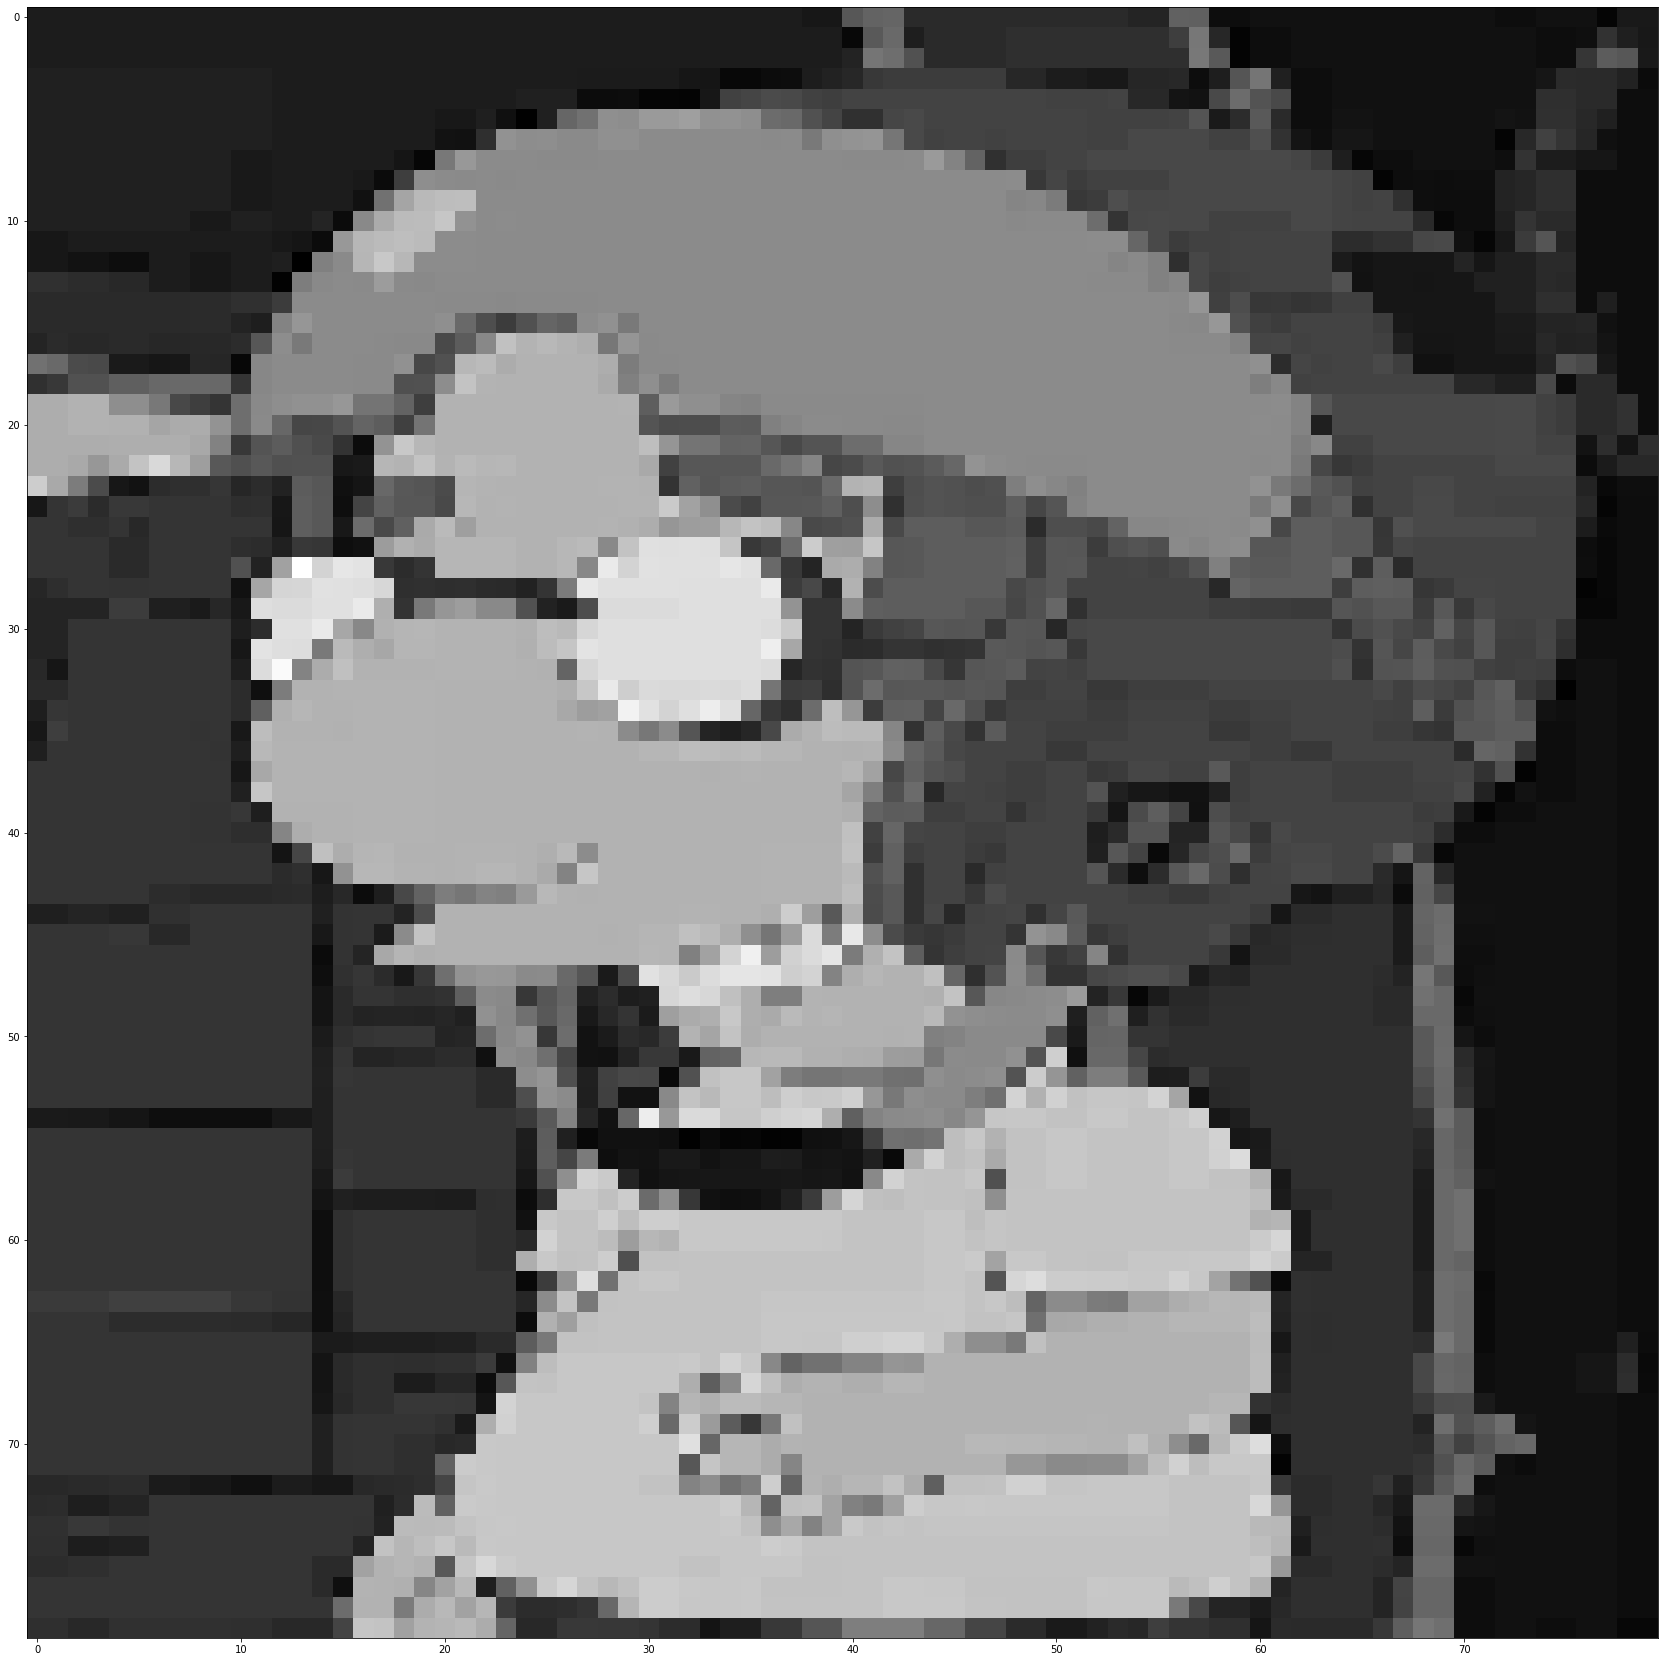

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [10]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [12]:
## In the tutorial, I've use the following line
### x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)
## However, due to recent API changes in `caer`, this is now a deprecated feature. 
## Instead, you can use the following line (which use's SkLearn's train-test split feature). 
## Both achieve the same end result 

# Do note that `val_ratio` is now `test_size`. 
split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [13]:

del train
del featureSet
del labels 
gc.collect()

2921

In [14]:
BATCH_SIZE = 32
EPOCHS = 10

In [15]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [16]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 147s 422ms/step - loss: 0.4030 - accuracy: 0.1388 - val_loss: 0.3312 - val_accuracy: 0.1679
Epoch 2/10
345/345 [==============================] - 131s 380ms/step - loss: 0.3237 - accuracy: 0.1616
Epoch 3/10
345/345 [==============================] - 133s 385ms/step - loss: 0.3234 - accuracy: 0.1622
Epoch 4/10
345/345 [==============================] - 132s 383ms/step - loss: 0.3231 - accuracy: 0.1602
Epoch 5/10
345/345 [==============================] - 134s 387ms/step - loss: 0.3202 - accuracy: 0.1704
Epoch 6/10
345/345 [==============================] - 133s 384ms/step - loss: 0.3087 - accuracy: 0.2216
Epoch 7/10
345/345 [==============================] - 136s 395ms/step - loss: 0.3048 - accuracy: 0.2453
Epoch 8/10
345/345 [==============================] - 133s 385ms/step - loss: 0.3026 - accuracy: 0.2478
Epoch 9/10
345/345 [==============================] - 133s 385ms/step - loss: 0.3004 - accuracy: 0.2620
Epoch 10/10
345/345 [=

In [19]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

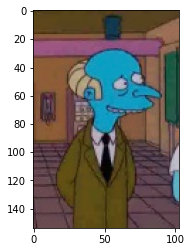

In [53]:
test_path = r'simpsons/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [54]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [55]:
predictions = model.predict(prepare(img))

In [56]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson


In [57]:
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)